In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

import torch
from torch.utils.data import DataLoader, TensorDataset
from torch import nn, optim

plt.style.use('dark_background')
pio.templates.default = "plotly_dark"

In [55]:
def predict(model, X):
    model.eval()
    with torch.no_grad():
        preds = model(X)
    return preds

In [2]:
x = np.linspace(-10, 10, 100)
y = x ** 2

df = pd.DataFrame({'x': x, 'y': y})

In [4]:
px.scatter(df, x='x', y='y', title='y = x^2').show()

In [43]:
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

dataset = TensorDataset(x_tensor, y_tensor)

In [128]:
model = nn.Sequential(
    nn.Linear(1, 2),
    nn.Sigmoid(),
    nn.Linear(2, 1),
)

In [163]:
lr = 0.00005
epochs = 3000

optimizer = optim.SGD(model.parameters(), lr=lr)
criterion = nn.MSELoss()

losses = []
for epoch in range(1, epochs):
    dataloader = DataLoader(dataset, batch_size=16, shuffle=True)
    epoch_loss = 0.0
    for xb, yb in dataloader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * xb.size(0)
    epoch_loss /= len(dataloader.dataset)
    losses.append(epoch_loss)
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {epoch_loss:.4f}')


px.line(
    x=range(1, epochs),
    y=losses
)

Epoch 10, Loss: 45.1845
Epoch 20, Loss: 45.2898
Epoch 30, Loss: 45.1165
Epoch 40, Loss: 45.3178
Epoch 50, Loss: 45.2654
Epoch 60, Loss: 45.2266
Epoch 70, Loss: 45.0791
Epoch 80, Loss: 44.9585
Epoch 90, Loss: 45.1110
Epoch 100, Loss: 45.0436
Epoch 110, Loss: 44.9037
Epoch 120, Loss: 45.2363
Epoch 130, Loss: 45.1039
Epoch 140, Loss: 45.0174
Epoch 150, Loss: 45.2074
Epoch 160, Loss: 45.0889
Epoch 170, Loss: 44.9836
Epoch 180, Loss: 44.9347
Epoch 190, Loss: 45.3802
Epoch 200, Loss: 44.9340
Epoch 210, Loss: 45.5753
Epoch 220, Loss: 44.8687
Epoch 230, Loss: 44.9922
Epoch 240, Loss: 44.7722
Epoch 250, Loss: 44.9739
Epoch 260, Loss: 45.2141
Epoch 270, Loss: 44.8313
Epoch 280, Loss: 45.0412
Epoch 290, Loss: 44.9810
Epoch 300, Loss: 44.7139
Epoch 310, Loss: 44.8763
Epoch 320, Loss: 44.9154
Epoch 330, Loss: 44.9689
Epoch 340, Loss: 44.9762
Epoch 350, Loss: 44.9001
Epoch 360, Loss: 44.7075
Epoch 370, Loss: 44.9552
Epoch 380, Loss: 44.7368
Epoch 390, Loss: 45.1774
Epoch 400, Loss: 44.7334
Epoch 410

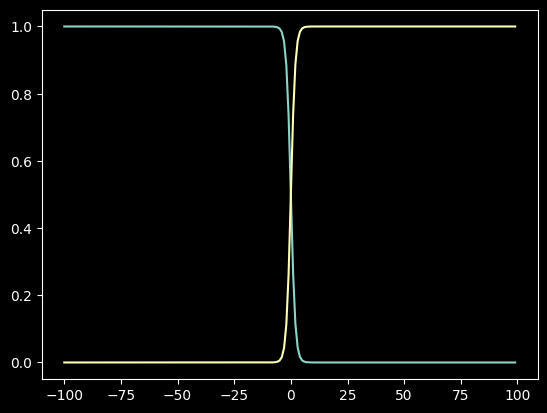

In [176]:
x_range = torch.arange(-100, 100).view(-1, 1).float()

l1 = model.state_dict()['0.weight']

l1_y = torch.sigmoid(l1 @ x_range.t())

plt.plot(x_range, l1_y[0].numpy(), label='Neuron 1')
plt.plot(x_range, l1_y[1].numpy(), label='Neuron 2')